In [1]:
from datasets import LungDataset
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Import the train, test, and val datasets
train_dataset = LungDataset('train')
test_dataset = LungDataset('test')
val_dataset = LungDataset('val')

In [3]:
# Visualize a random sample of 25 images in each category
def plot_sample(dataset, nrows=5, ncols=5):
    for cls in dataset.classes:
        fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
        a = dataset.dataset_numbers[cls]
        sz = nrows * ncols
        if a <= sz:
            idxs = np.append(np.random.permutation(a), [None]*(sz-a))
        else:
            idxs = np.random.choice(a, sz, replace=False)
        idxs = idxs.reshape((nrows, ncols))
        for i in range(nrows):
            for j in range(ncols):
                idx = idxs[i][j]
                if idx is not None:
                    im = dataset.open_img(cls, int(idx))
                    axes[i][j].imshow(im)
                    axes[i][j].set_title('{}.jpg'.format(idx), size=10, y=0.97)
                axes[i][j].tick_params(which='both', left=False, labelleft=False, bottom=False, labelbottom=False)
        fig.suptitle(cls.replace('_', ' ').title(), size=18, x=0.51, y=0.93)
        plt.show()

This is the train dataset of the Lung Dataset used in the Small Project for the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 5216 images of size 150 by 150.
The images are split into the following classes and they are stored in the following locations:
 - normal (1341 images), in './dataset/train/normal'.
 - infected_noncovid (2530 images), in './dataset/train/infected/non-covid'.
 - infected_covid (1345 images), in './dataset/train/infected/covid'.



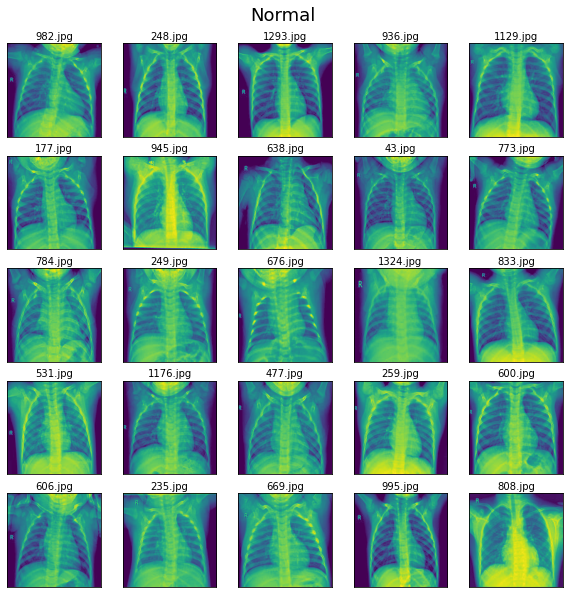

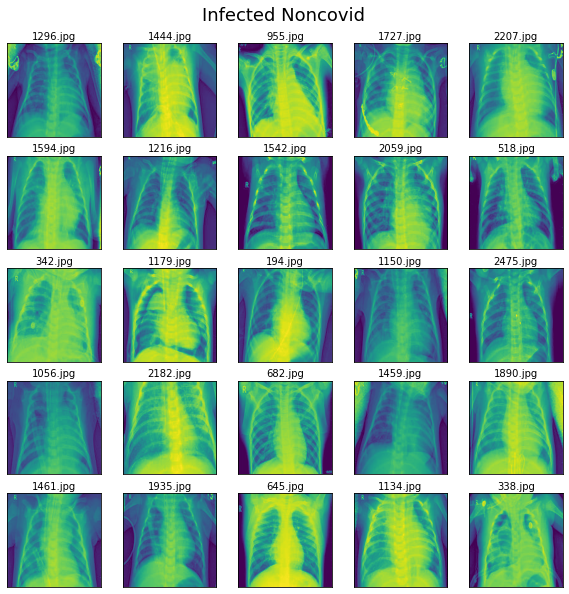

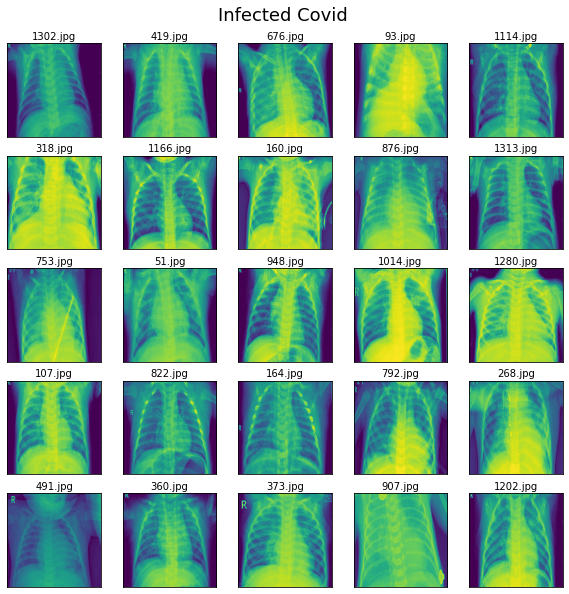

In [4]:
train_dataset.describe()

plot_sample(train_dataset)

This is the test dataset of the Lung Dataset used in the Small Project for the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 614 images of size 150 by 150.
The images are split into the following classes and they are stored in the following locations:
 - normal (234 images), in './dataset/test/normal'.
 - infected_noncovid (242 images), in './dataset/test/infected/non-covid'.
 - infected_covid (138 images), in './dataset/test/infected/covid'.



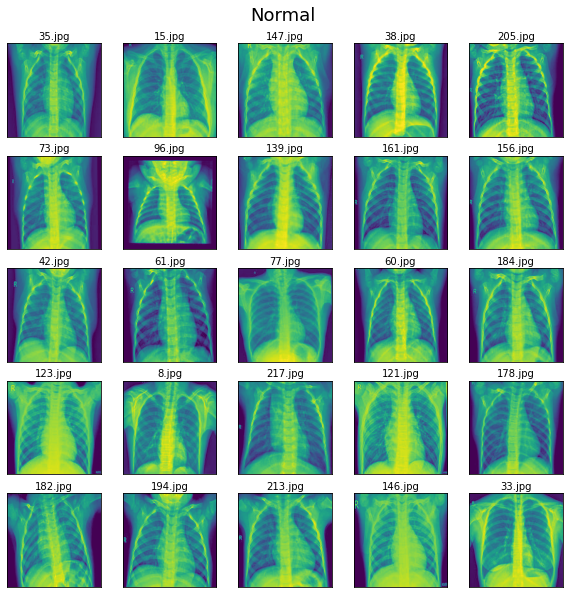

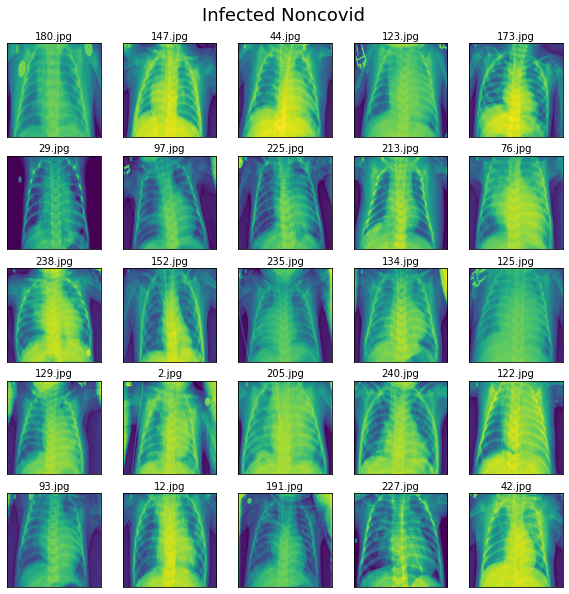

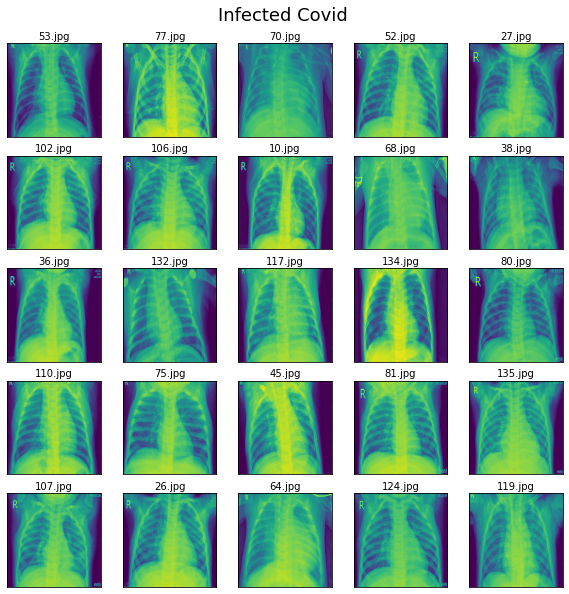

In [5]:
test_dataset.describe()

plot_sample(test_dataset)

This is the val dataset of the Lung Dataset used in the Small Project for the 50.039 Deep Learning class in Feb-March 2021. 
It contains a total of 24 images of size 150 by 150.
The images are split into the following classes and they are stored in the following locations:
 - normal (8 images), in './dataset/val/normal'.
 - infected_noncovid (8 images), in './dataset/val/infected/non-covid'.
 - infected_covid (8 images), in './dataset/val/infected/covid'.



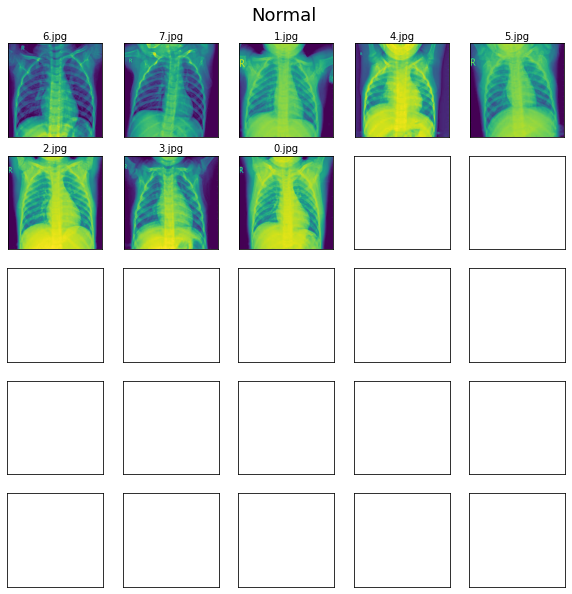

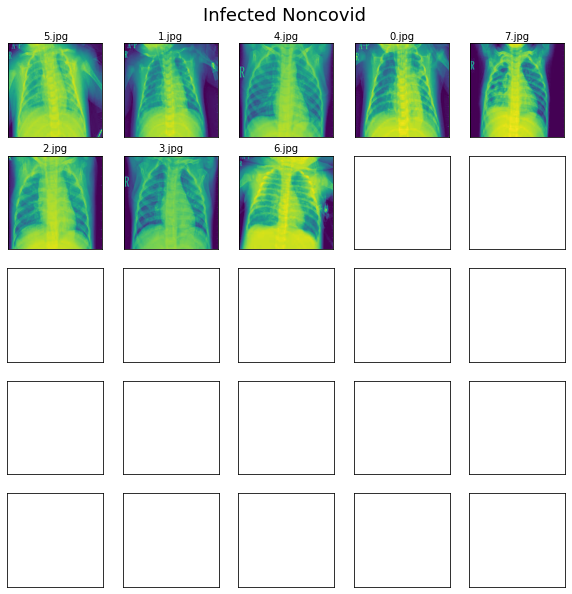

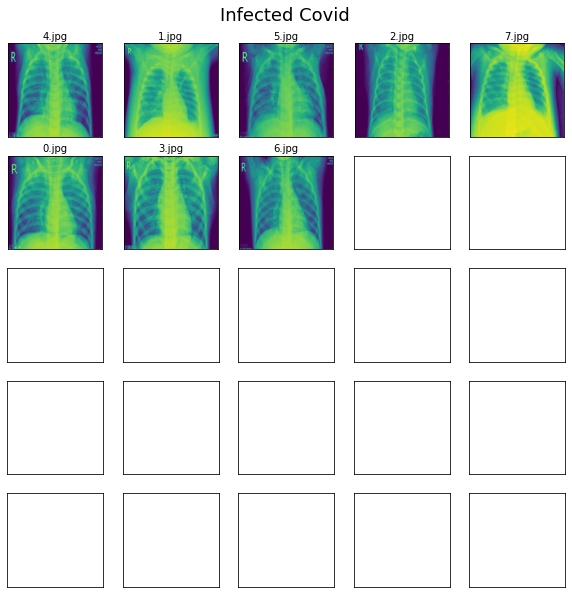

In [6]:
val_dataset.describe()

plot_sample(val_dataset)

In [7]:
# Prepare data
def prepare_data(train_dataset, test_dataset, val_dataset):
    a1 = train_dataset.dataset_numbers['normal']
    a2 = train_dataset.dataset_numbers['infected_noncovid']
    a3 = train_dataset.dataset_numbers['infected_covid']
    
    b1 = test_dataset.dataset_numbers['normal']
    b2 = test_dataset.dataset_numbers['infected_noncovid']
    b3 = test_dataset.dataset_numbers['infected_covid']
    
    c1 = val_dataset.dataset_numbers['normal']
    c2 = val_dataset.dataset_numbers['infected_noncovid']
    c3 = val_dataset.dataset_numbers['infected_covid']
    
    types = {'Normal': np.asarray([a1, b1, c1]),
             'Infected without Covid': np.asarray([a2, b2, c2]),
             'Infected with Covid': np.asarray([a3, b3, c3])}
    datasets = {'Train': np.asarray([a1, a2, a3]),
                'Test': np.asarray([b1, b2, b3]),
                'Validation': np.asarray([c1, c2, c3])}
    return types, datasets

types, datasets = prepare_data(train_dataset, test_dataset, val_dataset)
colors = ['green', 'steelblue', 'orange']

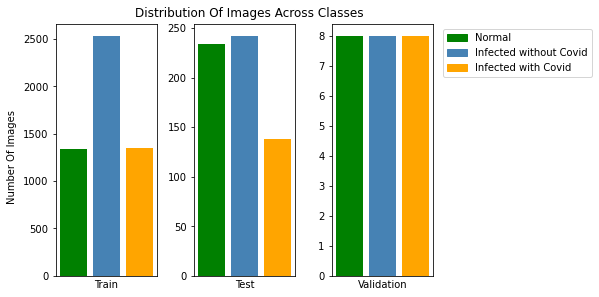

In [8]:
# Plot the distribution of images across classes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 4))

X = np.arange(3)
for i, (label, Y) in enumerate(datasets.items()):
    axes[i].bar(X, Y, color=colors)
    axes[i].set_xlabel(label)
    axes[i].tick_params(which='both', bottom=False, labelbottom=False)

fig.suptitle('Distribution Of Images Across Classes', x=0.55, y=1.02)
fig.text(s='Number Of Images', x=0, y=0.5, ha='center', va='center', rotation='vertical')
fig.tight_layout(w_pad=1)

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(handles, types, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

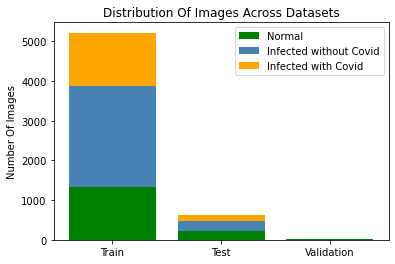

In [9]:
# Plot the distribution of images across datasets
X = list(datasets.keys())

bottom = np.zeros(3)
for i, (label, Y) in enumerate(types.items()):
    plt.bar(X, Y, label=label, color=colors[i], bottom=bottom)
    bottom += Y

plt.title('Distribution Of Images Across Datasets')
plt.ylabel('Number Of Images')
plt.legend()

plt.show()